In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_style("whitegrid")

#Supress Warnings:
import warnings
warnings.filterwarnings('ignore')

In [124]:
import os
from scipy import stats
import itertools
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objs as go
import math

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score

from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from scipy import stats
from scipy.stats import skew

In [2]:
df = pd.read_excel('Dry_bean/Dry_Bean_Dataset.xlsx',engine="openpyxl")
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [60]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [65]:
#Check for duplicate rows:
df.duplicated().sum()

68

In [69]:
df=df.drop_duplicates()

In [70]:
df.duplicated().sum()

0

# EDA

In [71]:
df.describe().T

count          mean           std           min  \
Area             13543.0  53048.460385  29392.438324  20420.000000   
Perimeter        13543.0    854.993406    214.722684    524.736000   
MajorAxisLength  13543.0    319.895602     85.809260    183.601165   
MinorAxisLength  13543.0    202.365321     45.051632    122.512653   
AspectRation     13543.0      1.581075      0.245245      1.024868   
Eccentricity     13543.0      0.750315      0.091858      0.218951   
ConvexArea       13543.0  53767.986709  29844.248525  20684.000000   
EquivDiameter    13543.0    253.034094     59.307709    161.243764   
Extent           13543.0      0.749829      0.048939      0.555315   
Solidity         13543.0      0.987152      0.004650      0.919246   
roundness        13543.0      0.873671      0.059393      0.489618   
Compactness      13543.0      0.800352      0.061464      0.640577   
ShapeFactor1     13543.0      0.006561      0.001130      0.002778   
ShapeFactor2     13543.0      0.001719      0.000595      0.000564   
ShapeFactor3     13543.0      0.644341      0.098653      0.410339   
ShapeFactor4     13543.0      0.995078      0.004347      0.947687   

                          25%           50%           75%            max  
Area             36282.500000  44580.000000  61382.000000  254616.000000  
Perimeter          703.230000    793.896000    977.146500    1985.370000  
MajorAxisLength    253.086806    296.404589    376.312489     738.860153  
MinorAxisLength    175.886357    192.491117    217.245403     460.198497  
AspectRation         1.430662      1.549860      1.703916       2.430306  
Eccentricity         0.715144      0.763997      0.809671       0.911423  
ConvexArea       36673.000000  45122.000000  62360.000000  263261.000000  
EquivDiameter      214.933277    238.245711    279.560351     569.374358  
Extent               0.718735      0.759903      0.786849       0.866195  
Solidity             0.985678      0.988288      0.990019       0.994677  
roundness            0.833410      0.883490      0.917031       0.990685  
Compactness          0.763228      0.801514      0.834470       0.987303  
ShapeFactor1         0.005893      0.006643      0.007270       0.010451  
ShapeFactor2         0.001158      0.001700      0.002173       0.003665  
ShapeFactor3         0.582517      0.642424      0.696341       0.974767  
ShapeFactor4         0.993720      0.996393      0.997891       0.999733

The feature scale quite varies. We may need feature scaling

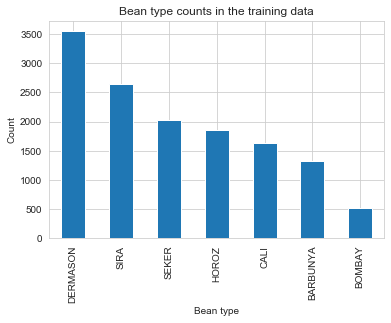

In [72]:
df["Class"].value_counts().plot(kind='bar',
                                   title= "Bean type counts in the training data",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

+ The data is imbalanced
    + Dermason is the most frequent beans (3500+)
    + Bombay is the least frequent beans (500+)

In [8]:
# data=df.loc[:,'Area':'ShapeFactor4']
# target=df.loc[:,'Class']

In [9]:
# # data split
# from sklearn.model_selection import train_test_split
# train_ratio = 0.70
# validation_ratio = 0.10
# test_ratio = 0.20

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=1 - train_ratio)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

## Unvariate Analysis

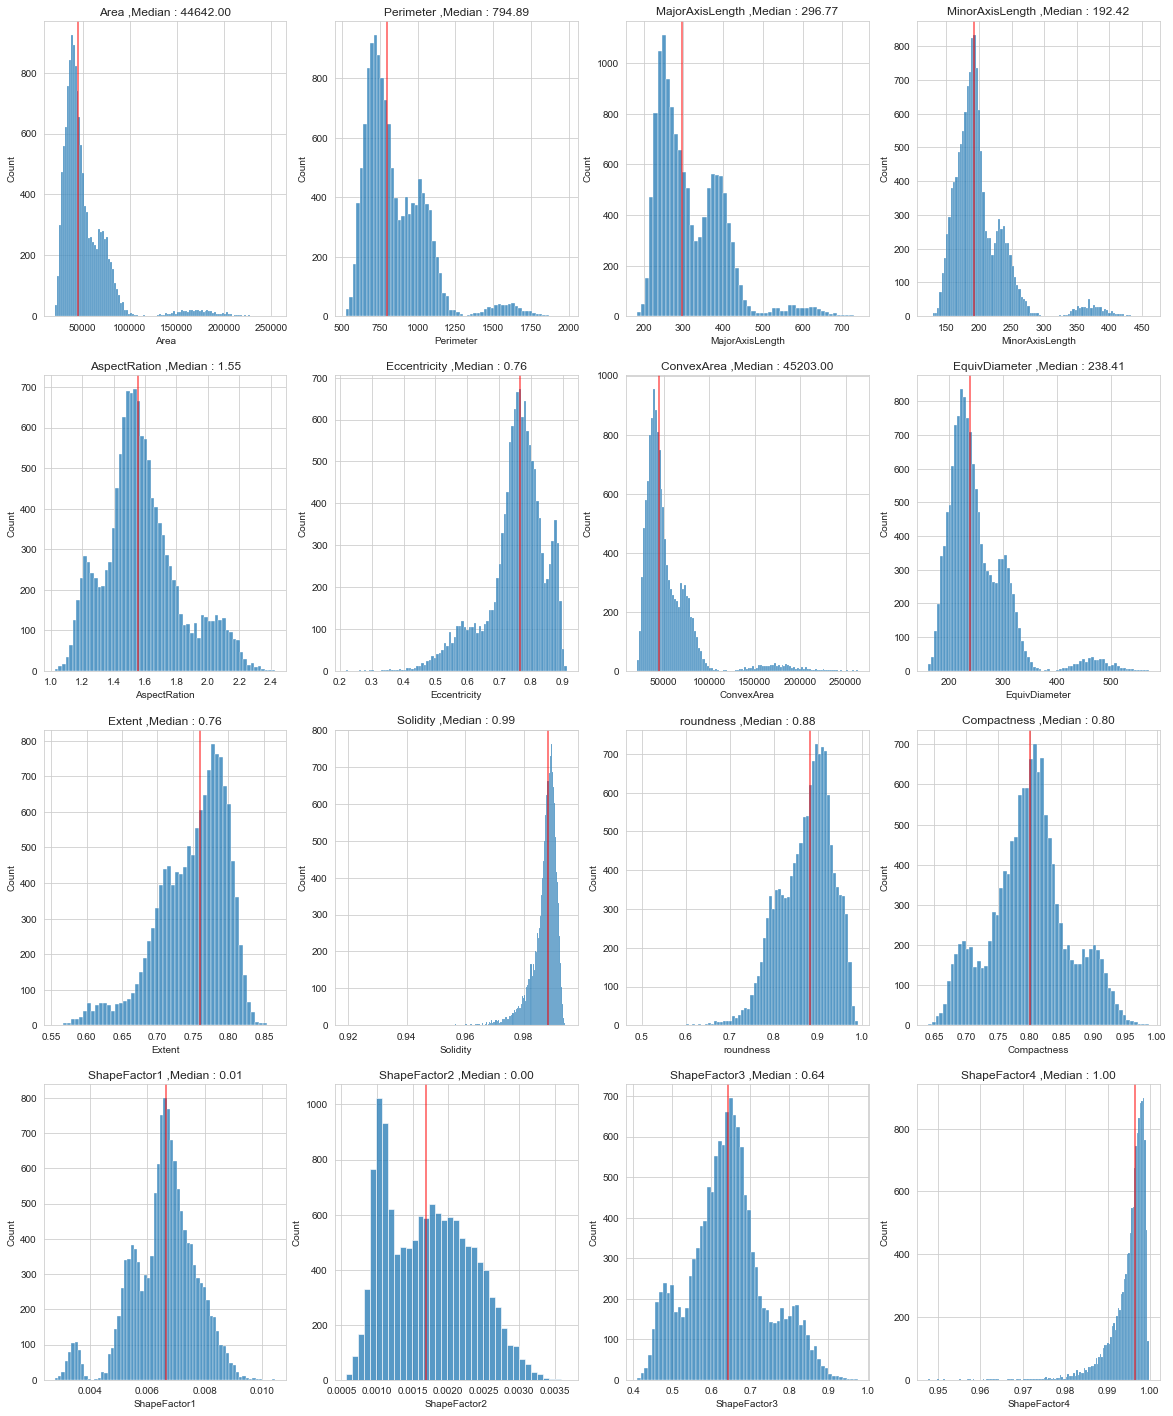

In [75]:
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(df.columns, axes.flatten()):
    sns.histplot(data=df[feature],ax=ax)
    median = X_train[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

+ Many features show skewness and outliers in their distribution, these points may resemble a unique class of dry beans.
+ We should investegate the distribution of each feature with respect to the classes of the dry beans.

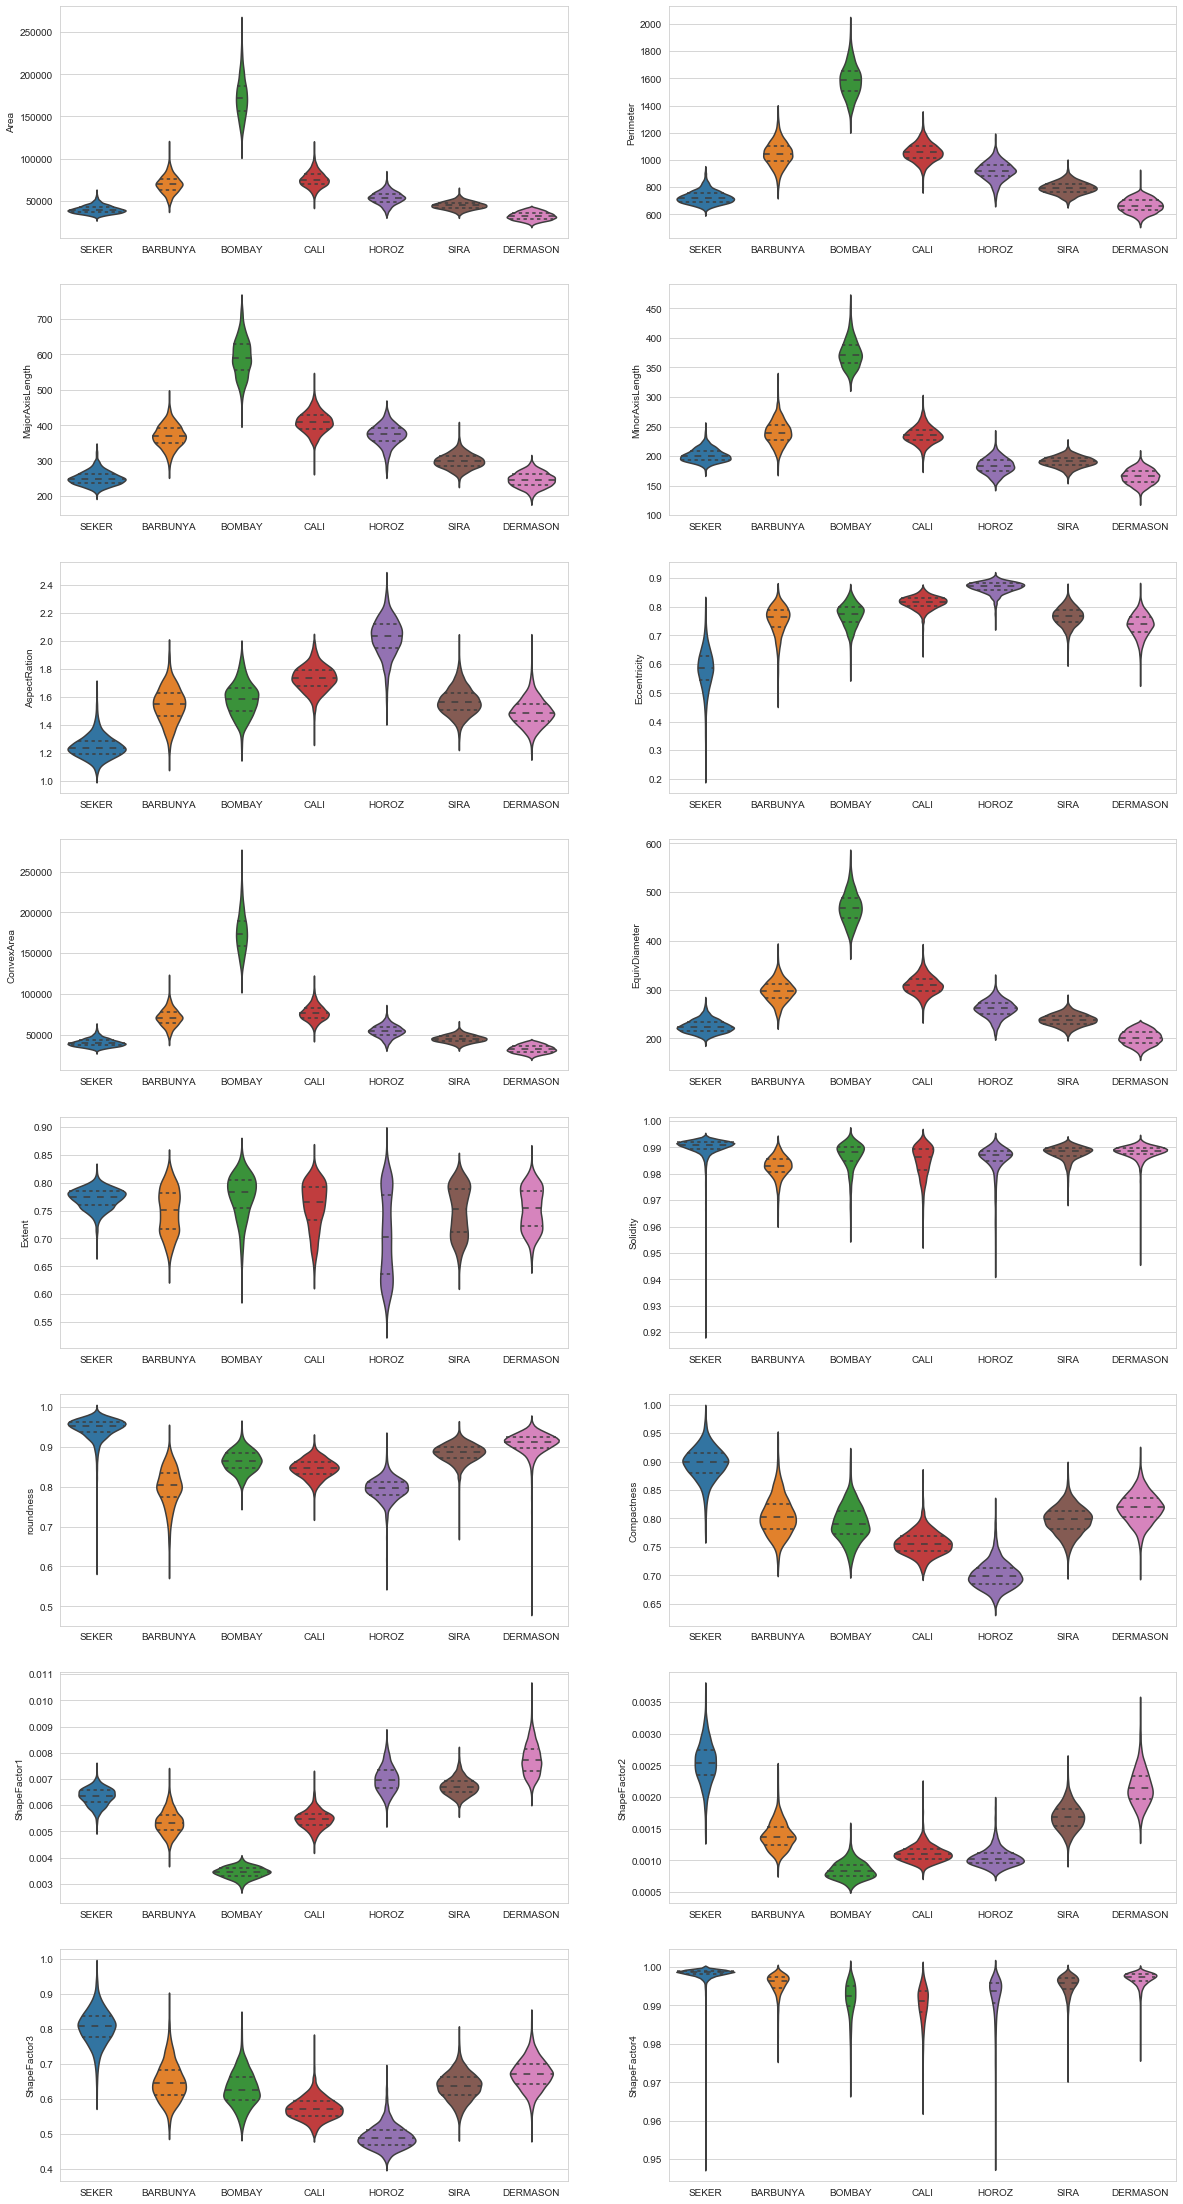

In [76]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(df.columns, axes.flatten()):
    sns.violinplot(data=df,
                   x='Class',
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

+ Some features have a very skewed distribution with long tails (eccentricity, solidity, roundness, shape factor2, shape factor4)
+ Bombay class differs greatly from other classes, it has a larger area and perimeter, and can be clearly distinguished from other classes based on Minor Axis Length (>310) and Shape Factor 1 (<0.0041).
+ Both Barbunya class and Cali class have similar distributions and values in many features (area, minor axis length, equivalent diameter, extent, shape factor1), which may lead to mislabeling one as the other.
+ Dermason class is similar to Seker class in some features, and Sira class in other features. It may be a difficult class to label accurately!

## Multivariate Analysis

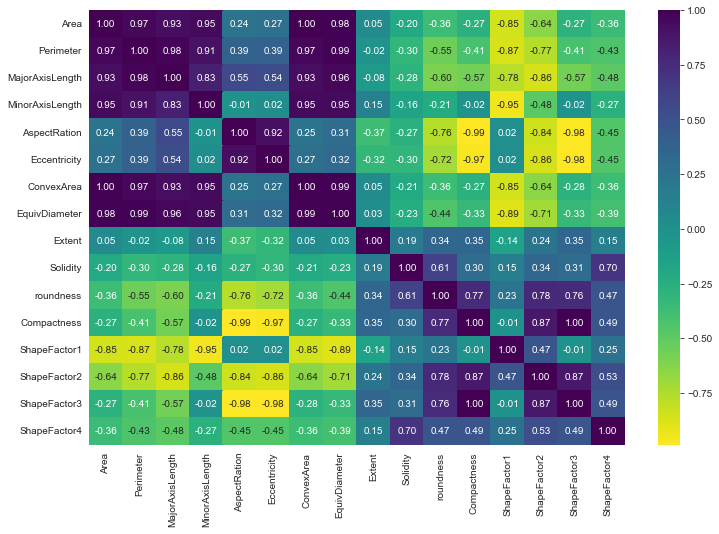

In [77]:
plt.figure(figsize = [12, 8])
sns.heatmap(df.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

+ There are a lot of linearly correlated features:
    + area & convex area : 1.00
    + compactness & shape factor 3 : 1.00
    + equivalent diameter & perimeter: 0.99
    + equivalent diameter & convex area: 0.99
    + major axis length & perimeter: 0.98
    + area & perimeter: 0.97
    + convex area & perimeter : 0.97
    + major axis length & equivalent diameter : 0.96
    + minor axis length & equivalent diameter : 0.95
    + minor axis length & convex area : 0.95
    + minor axis length & shape factor 1 : -0.95
    + eccentricity & compactness : -0.97
    + eccentricity & shape factor 3 : -0.98
    + aspect ration & shape factor 3 : -0.98
    + aspect ration & compactness : -0.99
+ We may try to select features manually or use PCA to get uncorrelated features.

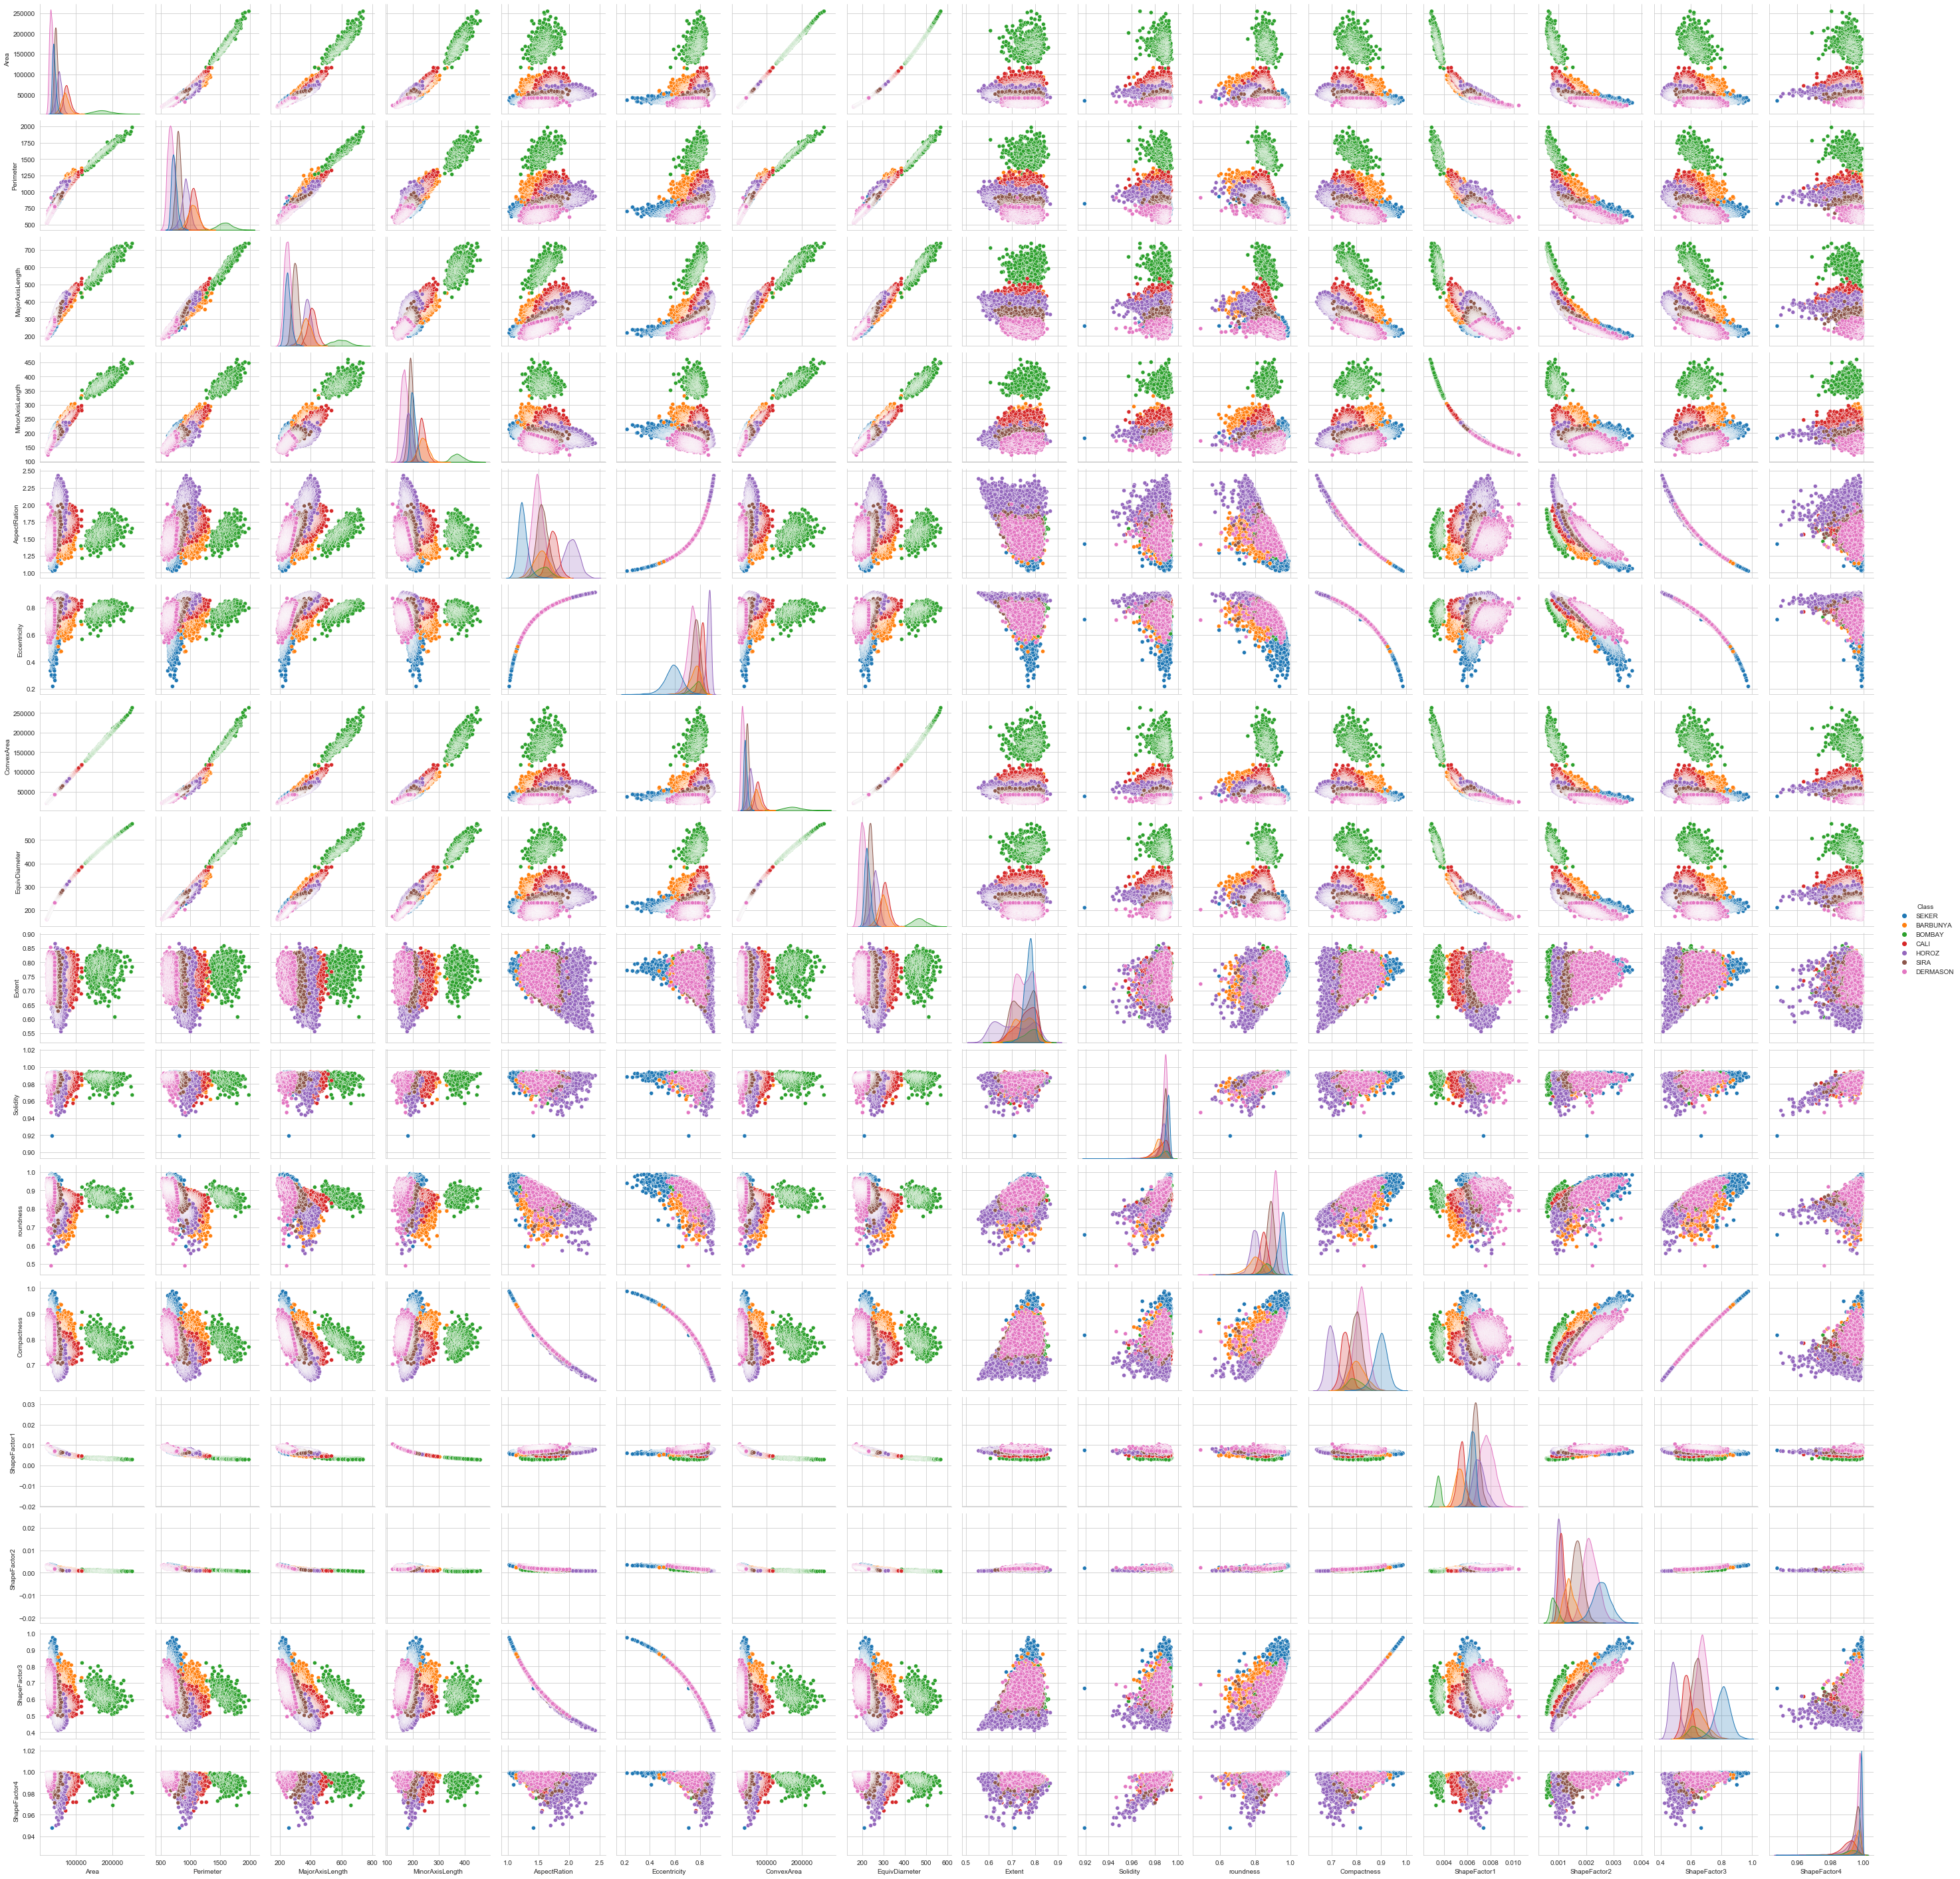

In [15]:
sns.pairplot(df, hue='Class')

+ We can see a linear trend between many features.
+ Notice that Bombay class is mostly separated from other classes in some features, which means that despite having low count in the dataset, a model may still be able to correctly classify it.
+ The classes are clearly clustered within some scatterplots, mainly between the area and perimeter features with all other features.
+ Even though we can see clusters for each class, there's some overlap between them, mainly between Dermason and Sira classes.
+ Some features (aspect ratio, eccentricity, compactness) seems to hit a bound when plotted against roundness , which indicates that (in the given data) no outliers occur above that bound.

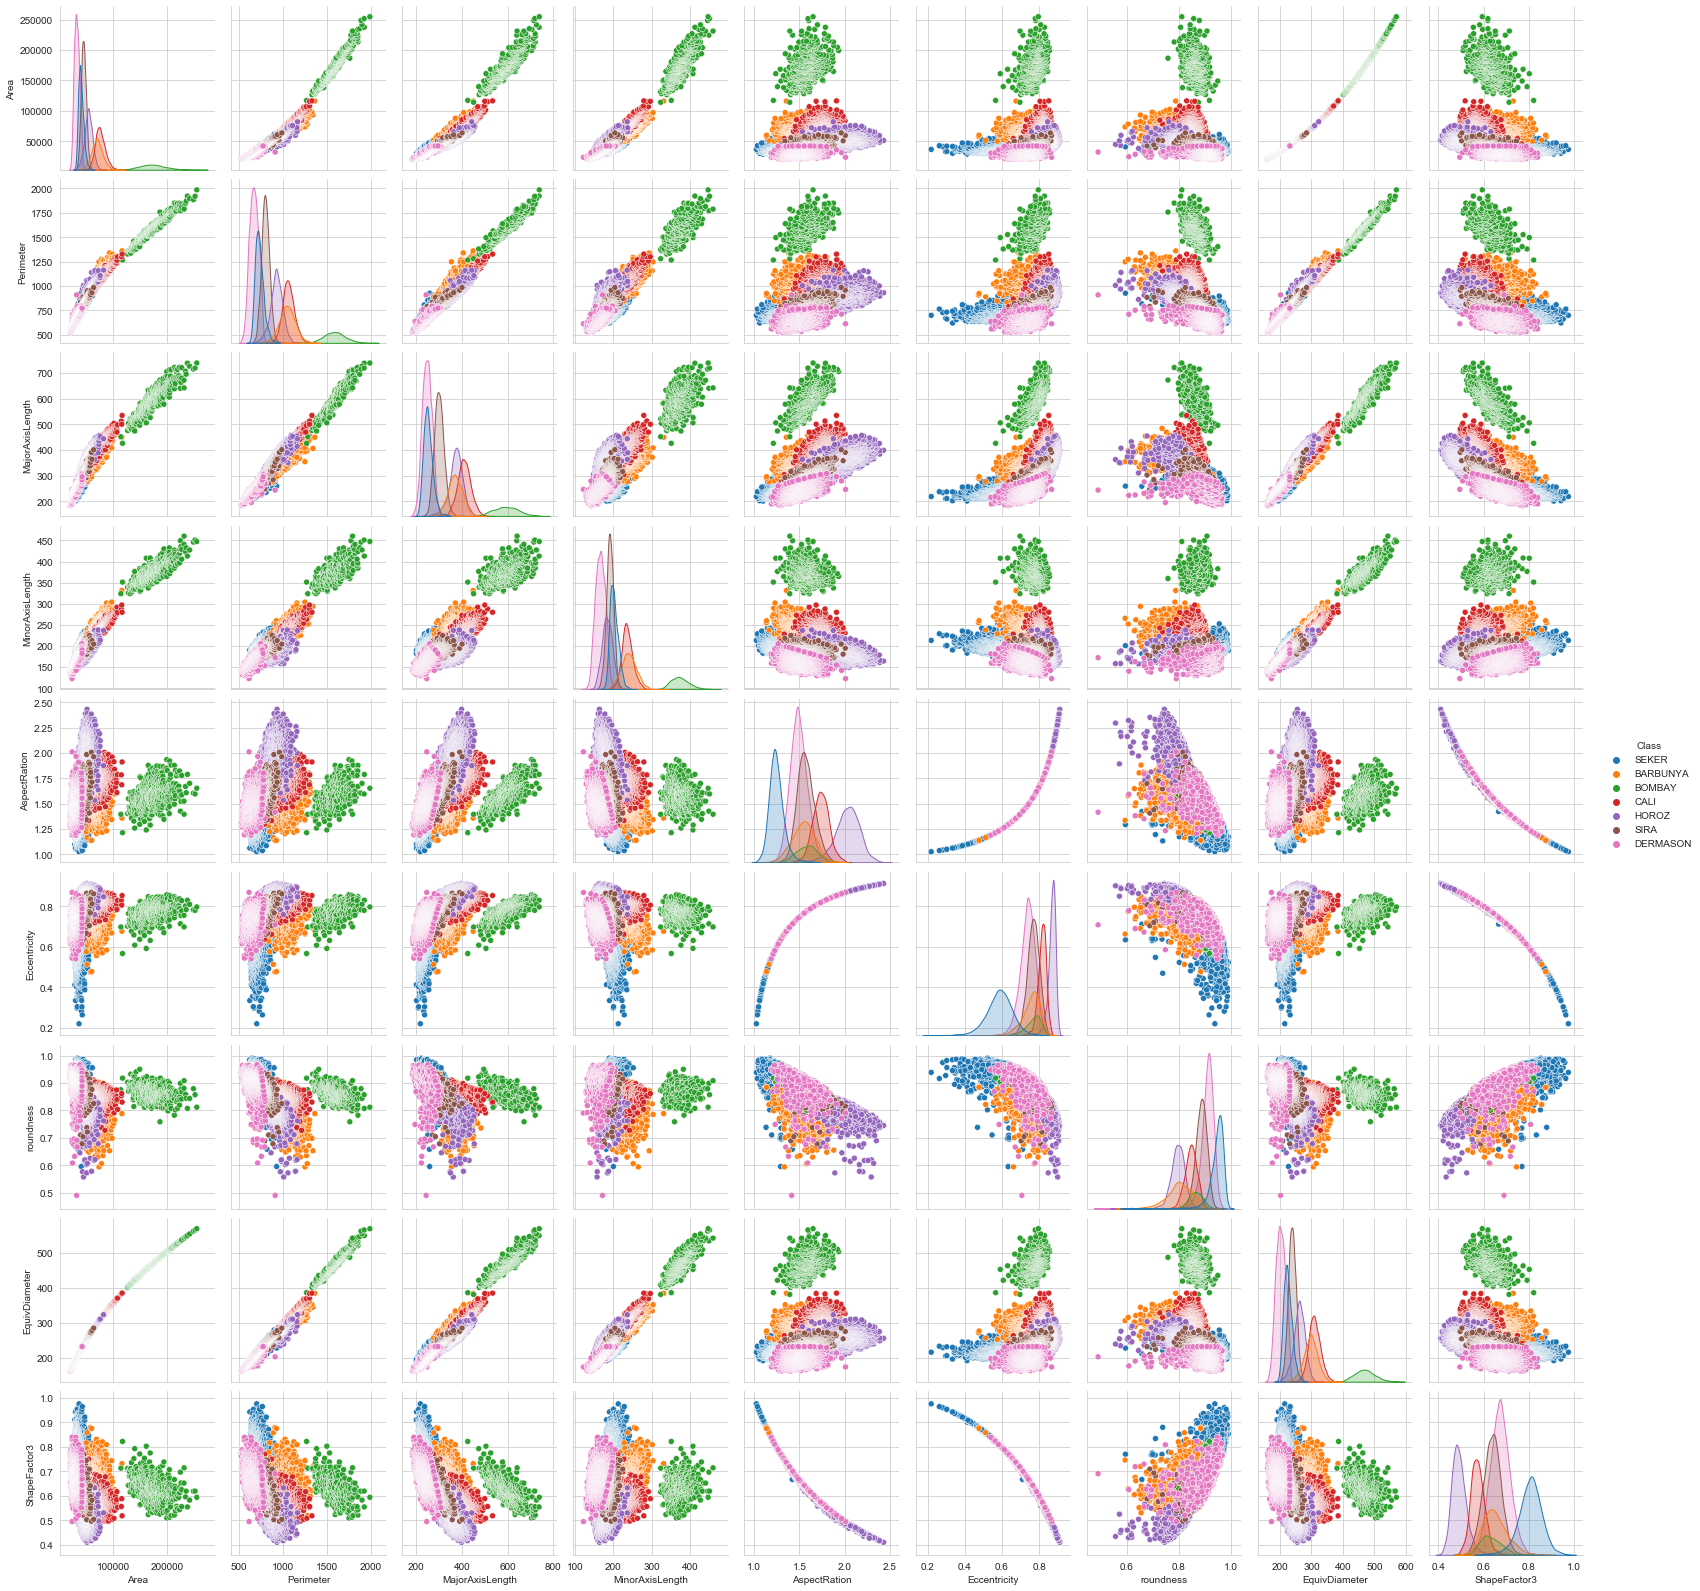

In [78]:
Strongly_corr_features = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                             'AspectRation', 'Eccentricity', 'roundness', 'EquivDiameter','ShapeFactor3',"Class"]]
Strongly_corr_features.head()
sns.pairplot(Strongly_corr_features, hue="Class")

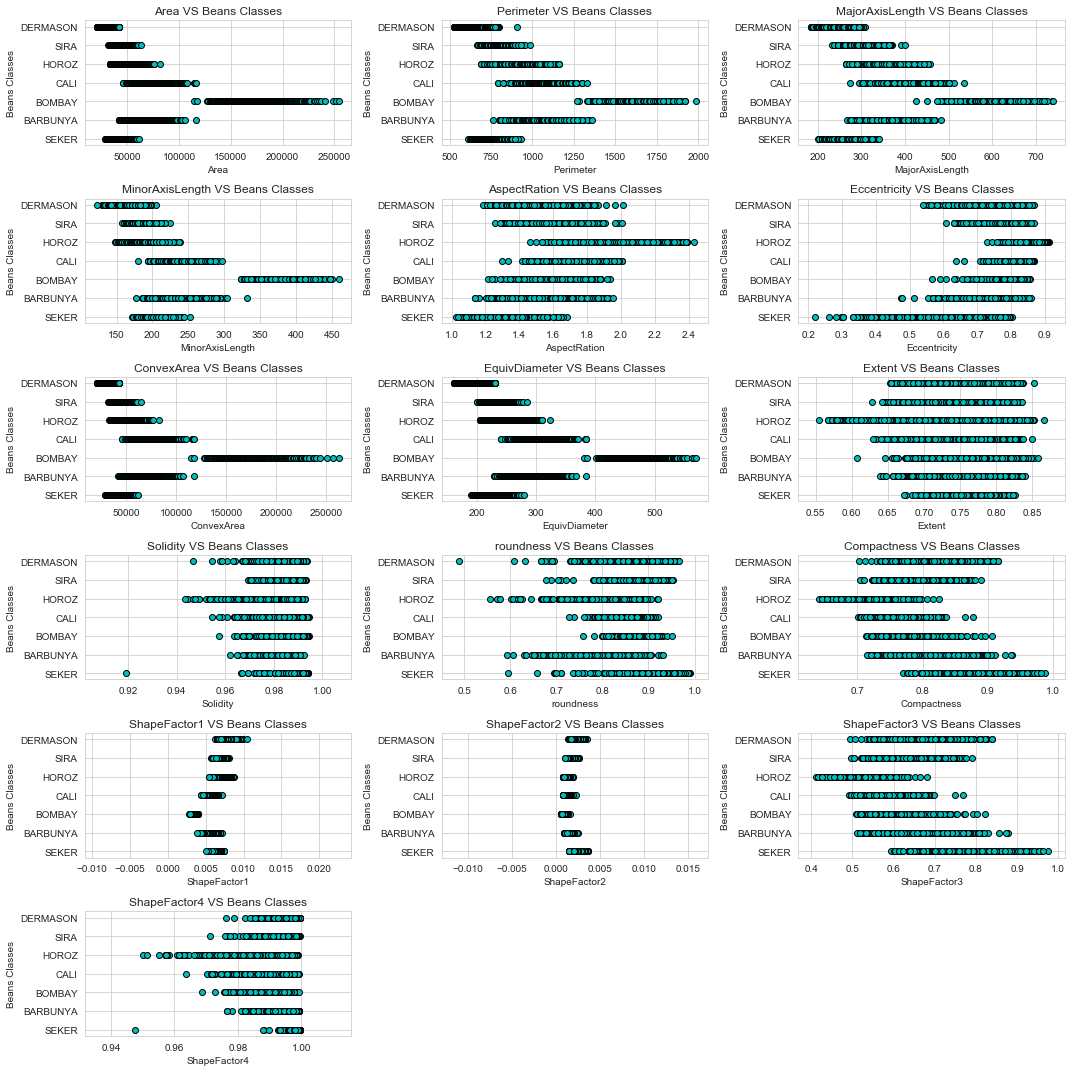

In [81]:
i = 1
plt.figure(figsize = [15, 15], tight_layout = 5)
for column in df.drop(['Class'], axis=1).columns:
    plt.subplot(6, 3, i)
    plt.scatter(data = df, x = column, y = 'Class', c='c', edgecolors='black')
    plt.xlabel(column)
    plt.ylabel('Beans Classes')
    plt.title(column + ' VS ' + 'Beans Classes')
    i += 1
plt.show()

# Scaling features

In [83]:
data = df.copy()
data.head(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7      0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5     0.923726      0.007020      0.003153      0.853270      0.999236  SEKER  
6     0.933374      0.006925      0.003242      0.871186      0.999049  SEKER  
7     0.925480      0.006979      0.003158      0.856514      0.998345  SEKER  
8     0.925658      0.006959      0.003152      0.856844      0.998953  SEKER  
9     0.912125      0.007045      0.003008      0.831973      0.999061  SEKER

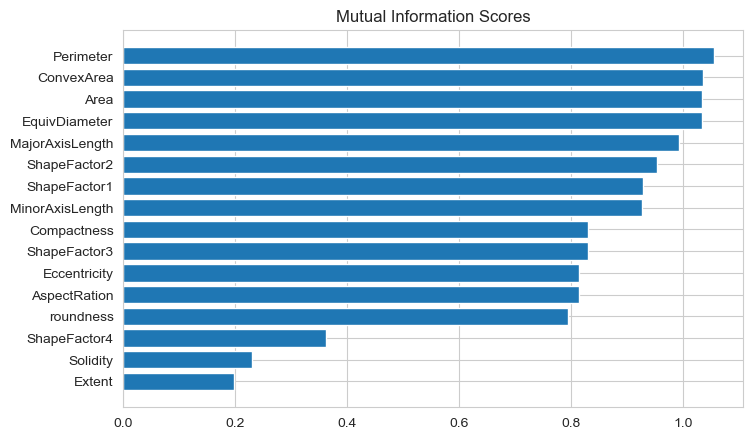

In [85]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Label encoding for categoricals
for colname in data.select_dtypes("object"):
    data[colname], _ = data[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = data.dtypes == int

mi_scores = make_mi_scores(data.drop(columns=['Class']), data.Class, discrete_features=False)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [86]:
def calc_skew(df):
    print("\nIF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 \n")
    for col in df.loc[:, df.dtypes != np.object ]:
        print("the skewness of ",col,"is :",df[col].skew())

calc_skew(data.drop(['Class'], axis=1))


IF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 

the skewness of  Area is : 2.9471356093223906
the skewness of  Perimeter is : 1.6280182896188335
the skewness of  MajorAxisLength is : 1.3658128808796521
the skewness of  MinorAxisLength is : 2.2320134464858525
the skewness of  AspectRation is : 0.5890446139852357
the skewness of  Eccentricity is : -1.0649316013992907
the skewness of  ConvexArea is : 2.936102309274981
the skewness of  EquivDiameter is : 1.9473028025362167
the skewness of  Extent is : -0.8956552957043488
the skewness of  Solidity is : -2.546876797380013
the skewness of  roundness is : -0.6487254756912723
the skewness of  Compactness is : 0.03630899543838119
the skewness of  ShapeFactor1 is : -0.5304266158500615
the skewness of  ShapeFactor2 is : 0.2943321999309591
the skewness of  ShapeFactor3 is : 0.24276656943282987
the skewness of  ShapeFactor4 is : -2.7601250309668064


# Data Preparation

In [138]:
def normalize_data(df,column):
    return StandardScaler().fit_transform(np.array(df[column]).reshape(-1,1))

def removeOutliers(df,outliersColomns):
    z_scores = stats. zscore(df[outliersColomns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = df[filtered_entries]
    return new_df

y_labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
def removeOutliers_cat(df_raw,outliersColomns):
    df = df_raw.copy()
    for cat_ in y_labels:
        df_ = df[df['Class']==cat_]
        z_scores = stats. zscore(df_[outliersColomns]) 
        abs_z_scores = np. abs(z_scores)
        filtered_entries = (abs_z_scores < 4). all(axis=1)
        df_ = df_[filtered_entries]
        df = df[df['Class']!=cat_]
        df = df.append(df_)
    return df

# Transform data
def transformation(df,columns,func):
    for col in columns:
        df[col]=func(df[col])
    return df


In [148]:
data = df.copy()
def prepare_data(df, isTest=False):
    
    outliersColomns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                       'ShapeFactor3', 'ShapeFactor4']
    if isTest == False:
#         pass
#         df=df[df['y']!='BOMBAY']
        before_ = len(df)
        # df = removeOutliers_cat(df,outliersColomns)
        print('Removed ',before_ - len(df),' outliers')
#         df = encodingTarget(df,['y'])
        
    # take log1p for right skewed and square for left skewedfeatures.
#     right_skew_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea']
#     left_skew_features = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4', 'Extent']
#     transformation(data, right_skew_features, np.log1p)
#     transformation(data, left_skew_features, np.square)
    
    df['ShapeFactor5'] = df['MajorAxisLength'] / df['Perimeter']
    df['ShapeFactor6'] = df['MinorAxisLength'] / df['Perimeter']
    df['ShapeFactor7'] = df['Eccentricity'] * df['Area']
    df['ShapeFactor8'] = df['Eccentricity'] * df['Perimeter']
    df['ShapeFactor9'] = df['Extent'] * df['Area']
    df['ShapeFactor10'] = df['Extent'] * df['Perimeter']
    
    NonScaledFeatures=['Class']
    for col_name in df.columns:
        if col_name not in NonScaledFeatures:
            scaled_col = col_name + '_r'
            df[col_name] = df[col_name].fillna(df[col_name].mean())  
            df[scaled_col]= df[col_name]
            df[col_name]=normalize_data(df,col_name)
            #make all values positive
#             min_ = abs(df[col_name].min())
#             df[col_name]= df[col_name] + min_
            
    return df
  
data = prepare_data(data)
# labelencoder
labelencoder = LabelEncoder()
data['Class'] = labelencoder.fit_transform(data['Class'])

Removed  0  outliers


In [149]:
data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count  1.354300e+04  1.354300e+04     1.354300e+04     1.354300e+04   
mean   1.111801e-15  1.893929e-16    -3.422812e-16    -6.900303e-16   
std    1.000037e+00  1.000037e+00     1.000037e+00     1.000037e+00   
min   -1.110138e+00 -1.538122e+00    -1.588400e+00    -1.772535e+00   
25%   -5.704385e-01 -7.068140e-01    -7.786020e-01    -5.877688e-01   
50%   -2.881276e-01 -2.845515e-01    -2.737686e-01    -2.191834e-01   
75%    2.835371e-01  5.689087e-01     6.574928e-01     3.303017e-01   
max    6.858056e+00  5.264550e+00     4.882690e+00     5.723271e+00   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter        Extent  \
count  1.354300e+04  1.354300e+04  1.354300e+04   1.354300e+04  1.354300e+04   
mean   1.216173e-15 -9.134070e-16  1.596801e-16  -4.276486e-16 -4.870455e-16   
std    1.000037e+00  1.000037e+00  1.000037e+00   1.000037e+00  1.000037e+00   
min   -2.268048e+00 -5.784847e+00 -1.108596e+00  -1.547754e+00 -3.974761e+00   
25%   -6.133411e-01 -3.829016e-01 -5.728279e-01  -6.424498e-01 -6.353885e-01   
50%   -1.272846e-01  1.489557e-01 -2.897143e-01  -2.493593e-01  2.058485e-01   
75%    5.009079e-01  6.462006e-01  2.879057e-01   4.472814e-01  7.564623e-01   
max    3.462912e+00  1.753949e+00  7.019803e+00   5.334078e+00  2.377834e+00   

           Solidity  ...  ShapeFactor1_r  ShapeFactor2_r  ShapeFactor3_r  \
count  1.354300e+04  ...    13543.000000    13543.000000    13543.000000   
mean   1.293750e-14  ...        0.006561        0.001719        0.644341   
std    1.000037e+00  ...        0.001130        0.000595        0.098653   
min   -1.460372e+01  ...        0.002778        0.000564        0.410339   
25%   -3.169215e-01  ...        0.005893        0.001158        0.582517   
50%    2.442264e-01  ...        0.006643        0.001700        0.642424   
75%    6.165309e-01  ...        0.007270        0.002173        0.696341   
max    1.618441e+00  ...        0.010451        0.003665        0.974767   

       ShapeFactor4_r  ShapeFactor5_r  ShapeFactor6_r  ShapeFactor7_r  \
count    13543.000000    13543.000000    13543.000000    13543.000000   
mean         0.995078        0.372980        0.239589    40528.149884   
std          0.004347        0.020709        0.024622    24201.114820   
min          0.947687        0.268124        0.157114     7990.845307   
25%          0.993720        0.360267        0.223988    24523.486551   
50%          0.996393        0.373595        0.240081    33614.872645   
75%          0.997891        0.385425        0.253926    50135.671828   
max          0.999733        0.428848        0.308065   202624.851901   

       ShapeFactor8_r  ShapeFactor9_r  ShapeFactor10_r  
count    13543.000000    13543.000000     13543.000000  
mean       649.227126    39855.899580       640.882567  
std        205.244254    22965.920596       169.296152  
min        153.040802    15090.808731       383.970102  
25%        488.072857    27462.006149       532.456806  
50%        605.696825    33070.681570       588.406525  
75%        801.793963    45310.501713       724.198708  
max       1592.874210   200611.392105      1556.231404  

[8 rows x 45 columns]

In [150]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'ShapeFactor5', 'ShapeFactor6',
       'ShapeFactor7', 'ShapeFactor8', 'ShapeFactor9', 'ShapeFactor10',
       'Area_r', 'Perimeter_r', 'MajorAxisLength_r', 'MinorAxisLength_r',
       'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r', 'EquivDiameter_r',
       'Extent_r', 'Solidity_r', 'roundness_r', 'Compactness_r',
       'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r', 'ShapeFactor4_r',
       'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r', 'ShapeFactor8_r',
       'ShapeFactor9_r', 'ShapeFactor10_r'],
      dtype='object')

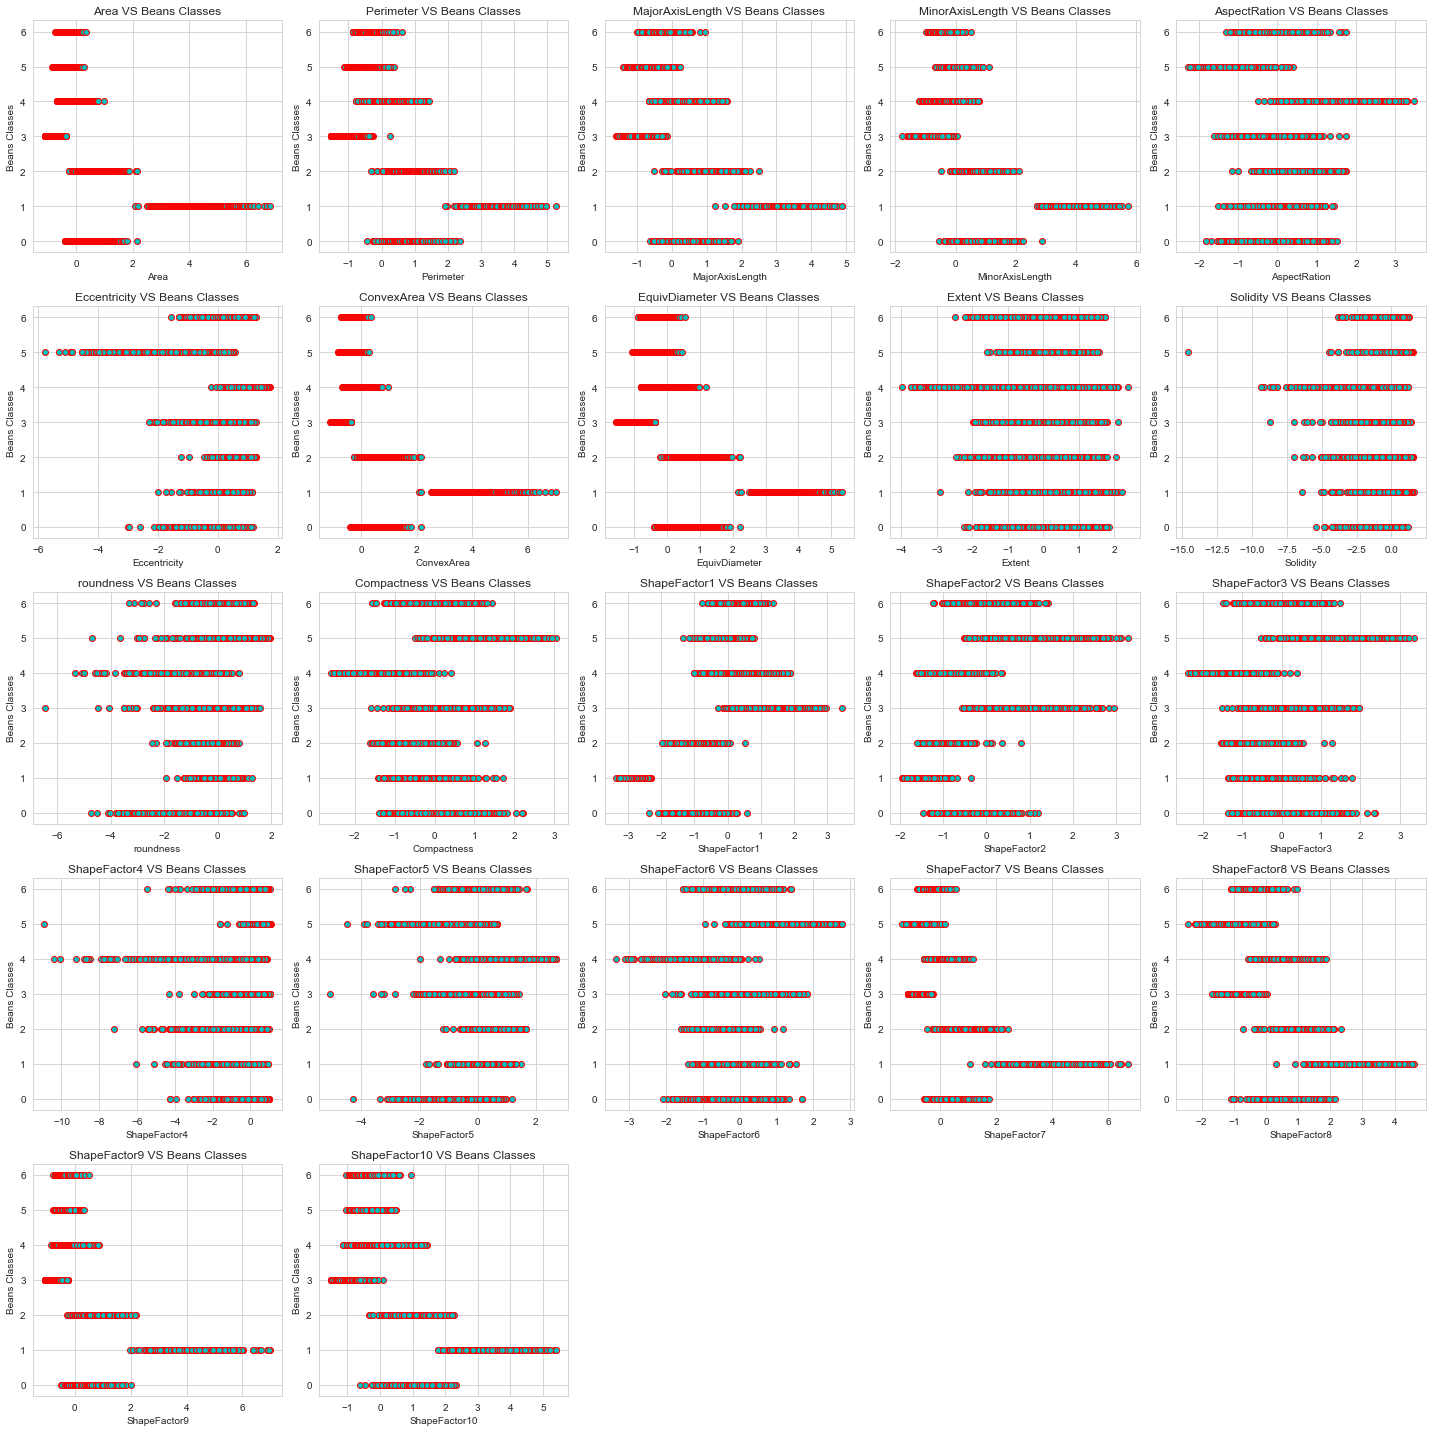

In [97]:
visualization_df=data.drop(['Area_r', 'Perimeter_r', 'MajorAxisLength_r', 'MinorAxisLength_r',
       'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r', 'EquivDiameter_r',
       'Extent_r', 'Solidity_r', 'roundness_r', 'Compactness_r',
       'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r', 'ShapeFactor4_r',
       'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r', 'ShapeFactor8_r',
       'ShapeFactor9_r', 'ShapeFactor10_r'], axis=1)
i = 1
plt.figure(figsize = [20, 20], tight_layout = 5)
for column in visualization_df.drop(['Class'], axis=1).columns:
    plt.subplot(5, 5, i)
    plt.scatter(data = visualization_df, x = column, y = 'Class', c='c', edgecolors='red')
    plt.xlabel(column)
    plt.ylabel('Beans Classes')
    plt.title(column + ' VS ' + 'Beans Classes')
    i += 1
plt.show()

# Features-labels split and train-validation split

In [151]:
train_df, test_df = train_test_split(data, test_size=0.20, random_state=42, shuffle=True, stratify=data.Class) 

x_test = test_df.drop(columns=['Class'])
y_test = test_df['Class']

In [152]:
train_df, val_df = train_test_split(train_df, test_size=0.10, random_state=42, shuffle=True, stratify=train_df.Class) 

x_train = train_df.drop(columns=['Class'])
y_train = train_df['Class']

x_val = val_df.drop(columns=['Class'])
y_val = val_df['Class']

In [153]:
print(x_train.shape[0], x_val.shape[0],x_test.shape[0])

9750 1084 2709


In [175]:
x_train.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6',
       'ShapeFactor7', 'ShapeFactor8', 'ShapeFactor9', 'ShapeFactor10',
       'Area_r', 'Perimeter_r', 'MajorAxisLength_r', 'MinorAxisLength_r',
       'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r', 'EquivDiameter_r',
       'Extent_r', 'Solidity_r', 'roundness_r', 'Compactness_r',
       'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r', 'ShapeFactor4_r',
       'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r', 'ShapeFactor8_r',
       'ShapeFactor9_r', 'ShapeFactor10_r'],
      dtype='object')

In [154]:
#dropped high correlated redundant features: 'ConvexArea', 'Compactness'

model_columns = [
                  'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                  'AspectRation', 'Eccentricity', 'roundness', 'Extent',  'ShapeFactor5',
                  'Solidity','ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
#                   'ShapeFactor5', 'ShapeFactor6', 'ShapeFactor7', 'ShapeFactor8',
#                   'ShapeFactor9', 'ShapeFactor10', 'ConvexArea', 'Compactness', 
#                    'EquivDiameter',
                  ]

In [155]:
y_labels_Post = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
# y_labels = labelencoder.transform(y_labels_Post)
print(y_labels_Post)
def ModelPredictionsPostProcessing(predictions_t,train_x,param=[0.00397101, 0.008575, 635.011, 30917.0, 0.539964, 0.838197, 0.966603, 0.9637, 2.01, 126500.0, 0.49473, 0.70337, 66105.9, 1155.934, 237.238412, 454.231985, 305.811572, 75191.0, 0.005591039999999999, 0.815341, 0.515836, 0.817632, 0.387031]):
  #This function do preprossing on the model predictions to decrease the errors of the model
    predictions_ = predictions_t.copy()
    for i in range(len(predictions_)):
        if (train_x['ShapeFactor1_r'].array[i] < param[0]) and (train_x['Area_r'].array[i] >param[9]):#param1,param10
            predictions_[i] = y_labels_Post[6]#'BOMBAY'
        elif  (train_x['ShapeFactor1_r'].array[i] > param[1]) or (train_x['Perimeter_r'].array[i] < param[2]) or (train_x['Area_r'].array[i] <param[3]):#param2, param3, param4
            predictions_[i] = y_labels_Post[0]#'DERMASON'
        else:
            if (train_x['Solidity_r'].array[i] >  0.9928774928774928 ) and predictions_[i] == y_labels_Post[ 0 ] :
                predictions_[i] = y_labels_Post[ 2 ]
            if (train_x['Extent_r'].array[i] <  0.7044686791405081 ) and predictions_[i] == y_labels_Post[ 2 ] :
                    predictions_[i] = y_labels_Post[ 1 ]
            if (train_x['Extent_r'].array[i] <  0.6469956019402373 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['roundness_r'].array[i] <  0.7959889783638006 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['Area_r'].array[i] <  55938 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['Extent_r'].array[i] <  0.6475477522670268 ) and predictions_[i] == y_labels_Post[ 5 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['AspectRation_r'].array[i] <  1.4973590208757783 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor4_r'].array[i] >  0.9989583842744816 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor5_r'].array[i] >  0.387031233685577 ) and predictions_[i] == y_labels_Post[ 5 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['ShapeFactor4_r'].array[i] <  0.9840169199256958 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['ShapeFactor5_r'].array[i] <  0.32719460392194527 ) and predictions_[i] == y_labels_Post[ 0 ] :
                predictions_[i] = y_labels_Post[ 2 ]
            if (train_x['Area_r'].array[i] >  57790 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor4_r'].array[i] <  0.9840169199256958 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['Area_r'].array[i] >  57790 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor4_r'].array[i] <  0.9840169199256958 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['ShapeFactor9_r'].array[i] >  43651.16685252113 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 2 ]
            if (train_x['Area_r'].array[i] <  55938 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['MinorAxisLength_r'].array[i] >  231.34609602337528 ) and predictions_[i] == y_labels_Post[ 3 ] :
                predictions_[i] = y_labels_Post[ 4 ]
            if (train_x['Perimeter_r'].array[i] >  881.1379999999998 ) and predictions_[i] == y_labels_Post[ 2 ] :
                predictions_[i] = y_labels_Post[ 5 ]

    return predictions_

['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']


In [ ]:
y_test = labelencoder.inverse_transform(y_test)

# Training different classification models

#### Light GBM

In [156]:
model_columns = [
                  'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                  'AspectRation', 'Eccentricity', 'roundness', 'Extent',  
                  'Solidity','ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
#                   'ShapeFactor5', 'ShapeFactor6', 'ShapeFactor7', 'ShapeFactor8',
#                   'ShapeFactor9', 'ShapeFactor10', 'ConvexArea', 'Compactness', 
#                    'EquivDiameter',
                  ]

In [157]:
from lightgbm import LGBMClassifier

from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [158]:
lgb_model = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
lgb_model.fit(x_train[model_columns], y_train)
predictions_LGB = lgb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_LGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_LGB))

Mean_F1_score 0.9418819188191881
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       1.00      1.00      1.00        42
           2       0.95      0.96      0.96       130
           3       0.92      0.94      0.93       284
           4       0.97      0.96      0.96       149
           5       0.96      0.97      0.97       162
           6       0.92      0.88      0.90       211

    accuracy                           0.94      1084
   macro avg       0.95      0.95      0.95      1084
weighted avg       0.94      0.94      0.94      1084



#### Multilayer Perceptron

Mean_F1_score 0.9437269372693727
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       1.00      1.00      1.00        42
           2       0.93      0.96      0.95       130
           3       0.92      0.96      0.94       284
           4       0.97      0.95      0.96       149
           5       0.98      0.94      0.96       162
           6       0.92      0.89      0.90       211

    accuracy                           0.94      1084
   macro avg       0.95      0.95      0.95      1084
weighted avg       0.94      0.94      0.94      1084



Text(0.5, 16.0, 'Predicted Label')

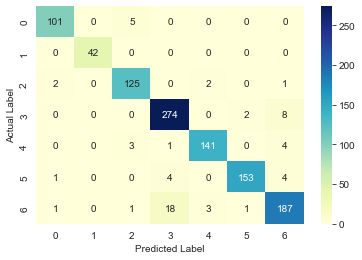

In [195]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)
mlp_model = mlp_model.fit(x_train[model_columns], y_train)

predictions_MLP = mlp_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_MLP, average='micro'))
# print("The accuracy of the classifier on the validation set is ", (mlp_model.score(x_val[model_columns], y_val)))
print("Classification Report")
print(classification_report(y_val, predictions_MLP))

mlp_cnf_matrix = confusion_matrix(y_val, predictions_MLP)
sns.heatmap(pd.DataFrame(mlp_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#### Support Vector Machine (SVM)

Mean_F1_score 0.9455719557195572
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       106
           1       1.00      1.00      1.00        42
           2       0.95      0.95      0.95       130
           3       0.93      0.95      0.94       284
           4       0.96      0.97      0.97       149
           5       0.97      0.96      0.97       162
           6       0.91      0.89      0.90       211

    accuracy                           0.95      1084
   macro avg       0.96      0.95      0.96      1084
weighted avg       0.95      0.95      0.95      1084



Text(0.5, 16.0, 'Predicted Label')

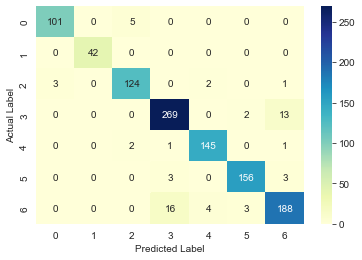

In [194]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
svc_model = SVC(C=1.0, kernel='rbf',probability=True, max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
# svc_model = SVC(C=1.0, kernel='poly', degree=3, max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
svc_model.fit(x_train[model_columns], y_train)

predictions_SVC = svc_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_SVC))

svc_cnf_matrix = confusion_matrix(y_val, predictions_SVC)
sns.heatmap(pd.DataFrame(svc_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [183]:
predictions_SVC = svc_model.predict(x_test[model_columns])
y_test_predictions_SVC = labelencoder.inverse_transform(predictions_SVC)


y_test_predictions_SVC_output = ModelPredictionsPostProcessing(y_test_predictions_SVC, x_test)

print('Mean_F1_score', f1_score(y_test,y_test_predictions_SVC, average='micro'))

print("Classification Report")
print(classification_report(y_test, y_test_predictions_SVC))

Mean_F1_score 0.9239571797711332
Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.95      0.94       326
    DERMASON       0.91      0.92      0.92       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.94      0.95      0.95       406
        SIRA       0.87      0.87      0.87       527

    accuracy                           0.92      2709
   macro avg       0.94      0.93      0.94      2709
weighted avg       0.92      0.92      0.92      2709



In [192]:
print('Mean_F1_score', accuracy_score(y_test,y_test_predictions_SVC))
print('Mean_F1_score', recall_score(y_test,y_test_predictions_SVC, average='micro'))
print('Mean_F1_score', precision_score(y_test,y_test_predictions_SVC, average='micro'))

Mean_F1_score 0.9239571797711332
Mean_F1_score 0.9239571797711332
Mean_F1_score 0.9239571797711332


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score

#### RandomForestClassifier

In [161]:
rf_model = RandomForestClassifier(n_estimators=1000, ccp_alpha=0.0001, criterion='entropy', max_depth=7, n_jobs=-1, random_state=42)
rf_model.fit(x_train[model_columns], y_train)

predictions_rf = rf_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_rf, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_rf))

Mean_F1_score 0.9280442804428044
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       106
           1       1.00      1.00      1.00        42
           2       0.92      0.95      0.94       130
           3       0.92      0.94      0.93       284
           4       0.97      0.94      0.95       149
           5       0.94      0.95      0.95       162
           6       0.89      0.88      0.88       211

    accuracy                           0.93      1084
   macro avg       0.94      0.94      0.94      1084
weighted avg       0.93      0.93      0.93      1084



#### NaiveBayes

Mean_F1_score 0.904059040590406
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       106
           1       1.00      1.00      1.00        42
           2       0.88      0.90      0.89       130
           3       0.93      0.88      0.90       284
           4       0.95      0.97      0.96       149
           5       0.92      0.93      0.93       162
           6       0.83      0.90      0.86       211

    accuracy                           0.90      1084
   macro avg       0.91      0.91      0.91      1084
weighted avg       0.91      0.90      0.90      1084



Text(0.5, 16.0, 'Predicted Label')

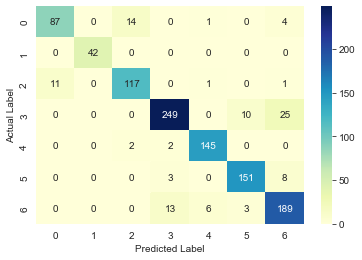

In [196]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB

nb_model = GaussianNB(priors=None, var_smoothing=1e-09)
nb_model.partial_fit(x_train[model_columns], y_train, np.unique(y_train))

predictions_NB = nb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_NB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_NB))


NB_cnf_matrix = confusion_matrix(y_val, predictions_NB)
sns.heatmap(pd.DataFrame(NB_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#### K-neighbor classifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(algorithm='auto', weights ='distance', n_neighbors=15)#=10
kn_model.fit(x_train[model_columns], y_train)
          
predictions_KN = kn_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_KN, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_KN))

Mean_F1_score 0.9372693726937269
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       106
           1       1.00      1.00      1.00        42
           2       0.94      0.98      0.96       130
           3       0.92      0.93      0.92       284
           4       0.97      0.95      0.96       149
           5       0.94      0.94      0.94       162
           6       0.90      0.90      0.90       211

    accuracy                           0.94      1084
   macro avg       0.95      0.95      0.95      1084
weighted avg       0.94      0.94      0.94      1084



# Model with and without SMOTE(over-sampling)

In [166]:
y_train.value_counts()

3    2553
6    1898
5    1459
4    1339
2    1174
0     951
1     376
Name: Class, dtype: int64

Before OverSampling, counts of label 'Horoz': 2553
Before OverSampling, counts of label 'Sira': 376 

After OverSampling, the shape of train_x: (17871, 44)
After OverSampling, the shape of train_y: (17871,) 

After OverSampling, counts of label 'Horoz', %: 14.285714285714285
After OverSampling, counts of label 'Sira', %: 14.285714285714285


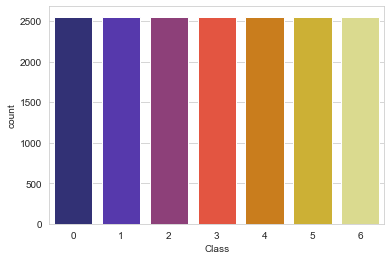

In [167]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label 'Horoz': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label 'Sira': {} \n".format(sum(y_train==1)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label 'Horoz', %: {}".format(sum(y_train_s==3)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label 'Sira', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=x_train_s, palette='CMRmap')

# 'DERMASON' :0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6
# seker = len(df[df.Class == 'SEKER'])
# bar = len(df[df.Class == 'BARBUNYA'])
# bom = len(df[df.Class == 'BOMBAY'])
# cali = len(df[df.Class == 'CALI'])
# der = len(df[df.Class == 'DERMASON'])
# horoz = len(df[df.Class == 'HOROZ'])
# sira = len(df[df.Class == 'SIRA'])

# Supervised binary classification(Random forest)

Evaluation of Random Forest Model Before SMOTE

Mean_F1_score 0.9418819188191881
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       106
           1       1.00      1.00      1.00        42
           2       0.94      0.96      0.95       130
           3       0.92      0.95      0.93       284
           4       0.96      0.96      0.96       149
           5       0.96      0.96      0.96       162
           6       0.93      0.88      0.90       211

    accuracy                           0.94      1084
   macro avg       0.95      0.95      0.95      1084
weighted avg       0.94      0.94      0.94      1084



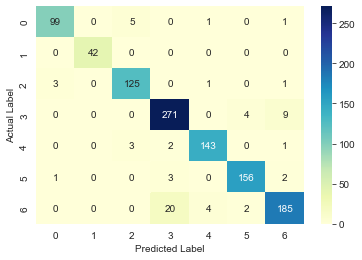

In [168]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions_RF = rf.predict(x_val)
rf_cnf_matrix = confusion_matrix(y_val, predictions_RF)
print('Evaluation of Random Forest Model Before SMOTE')
print()
#metrics(y_val, y_pred.round())

sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print('Mean_F1_score', f1_score(y_val, predictions_RF, average='micro'))
# print("The accuracy of the classifier on the validation set is ", (mlp_model.score(x_val[model_columns], y_val)))
print("Classification Report")
print(classification_report(y_val, predictions_RF))

Evaluation of Random Forest Model After SMOTE

Mean_F1_score 0.9363468634686348
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       106
           1       1.00      1.00      1.00        42
           2       0.93      0.95      0.94       130
           3       0.93      0.93      0.93       284
           4       0.97      0.95      0.96       149
           5       0.95      0.98      0.96       162
           6       0.91      0.88      0.89       211

    accuracy                           0.94      1084
   macro avg       0.95      0.95      0.95      1084
weighted avg       0.94      0.94      0.94      1084



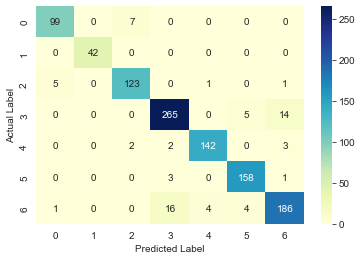

In [169]:
rf.fit(x_train_s, y_train_s)
predictions_RF_SMOTE = rf.predict(x_val)
rf_SMOTE_cnf_matrix = confusion_matrix(y_val, predictions_RF_SMOTE)
print('Evaluation of Random Forest Model After SMOTE')
print()
#metrics(y_val, y_pred.round())

sns.heatmap(pd.DataFrame(rf_SMOTE_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print('Mean_F1_score', f1_score(y_val, predictions_RF_SMOTE, average='micro'))
# print("The accuracy of the classifier on the validation set is ", (mlp_model.score(x_val[model_columns], y_val)))
print("Classification Report")
print(classification_report(y_val, predictions_RF_SMOTE))

# Unsupervised anomaly detection(Kmean)

In [171]:
from sklearn.cluster import KMeans

Evaluation of Random Forest Model Before SMOT

Mean_F1_score 0.20018450184501846
Classification Report
              precision    recall  f1-score   support

           0       0.08      0.13      0.10       106
           1       1.00      0.40      0.58        42
           2       0.00      0.00      0.00       130
           3       0.00      0.00      0.00       284
           4       0.19      0.23      0.21       149
           5       0.00      0.00      0.00       162
           6       0.48      0.72      0.58       211

    accuracy                           0.20      1084
   macro avg       0.25      0.21      0.21      1084
weighted avg       0.17      0.20      0.17      1084



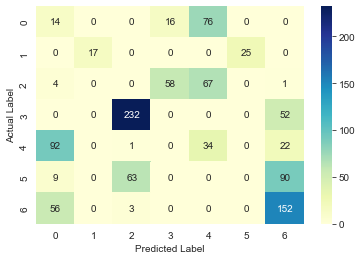

In [174]:
kmeans = KMeans(n_clusters=7, random_state=99)
kmeans.fit(x_train)
predictions_KMEANS = kmeans.predict(x_val)
kmeans_cnf_matrix = confusion_matrix(y_val, predictions_KMEANS)
print('Evaluation of Random Forest Model Before SMOT')
print()

sns.heatmap(pd.DataFrame(kmeans_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print('Mean_F1_score', f1_score(y_val, predictions_KMEANS, average='micro'))
# print("The accuracy of the classifier on the validation set is ", (mlp_model.score(x_val[model_columns], y_val)))
print("Classification Report")
print(classification_report(y_val, predictions_KMEANS))

In [176]:
classifiers = [
                ('SVC:', svc_model),
                ('MLP:', mlp_model),
                ('LGB:', lgb_model),
#                 ('GB:', gb_model),
#                 ('XGB:', xgb_model),
#                 ('BAG:', bag_model),
                ('KN:', kn_model),
#                 ('DT:', dt_model),
#                 ('NB:', nb_model),
                ]

for clf_name, clf in classifiers:
#     clf.fit(x_train[model_columns], y_train)
    y_pred = clf.predict(x_val[model_columns])
    print(clf_name, f1_score(y_val, y_pred, average='micro'))

vc = VotingClassifier(estimators=classifiers)
# kfold = StratifiedKFold(n_splits=10, random_state=42)
# cv_results = cross_val_score(vc, x_train[model_columns], y_train, cv=kfold, scoring='f1_micro')
vc.fit(x_train[model_columns], y_train)
y_pred_voting = vc.predict(x_val[model_columns])
print()
print('Voting Classifier: ',f1_score(y_val, y_pred_voting, average='micro'))

SVC: 0.9455719557195572
MLP: 0.9437269372693727
LGB: 0.9418819188191881
KN: 0.9372693726937269

Voting Classifier:  0.9455719557195572


In [181]:
y_test_predicted_vc = vc.predict(x_test[model_columns])
y_test_predicted_vc = labelencoder.inverse_transform(y_test_predicted_vc)
y_test = labelencoder.inverse_transform(y_test)

predictions_output = ModelPredictionsPostProcessing(y_test_predicted_vc, x_test)
# raw_test['y'] = y_test_predicted_vc

print('Mean_F1_score', f1_score(y_test, predictions_output, average='micro'))
# print("The accuracy of the classifier on the validation set is ", (mlp_model.score(x_val[model_columns], y_val)))
print("Classification Report")
print(classification_report(y_test, predictions_output))

Mean_F1_score 0.9198966408268734
Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.94      0.93       326
    DERMASON       0.90      0.93      0.92       709
       HOROZ       0.96      0.93      0.95       372
       SEKER       0.95      0.94      0.94       406
        SIRA       0.87      0.86      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

